# **Вступление**

В качестве темы работы было выбрано ***исследование данных фитнес трекера***.

Данные были выгружены из приложения ***samsung health***.

Период использования и ***срок***, за который удалось получить данные: ***чуть больше года***.

# **Анализ структуры данных**

В результате просмотра и анализа данных, полученных из распакованного ***архива***, удалось выяснить следующее:


*   Есть данные в ***csv*** и отдельная папка с ***json***.
*   ***json*** хранят информацию о днях, разделённую на ***часы***. Это та же информация, что можно найти и в csv, только разбитая на более мелкие промежутки времени.
*   ***csv*** хранят в основном данные, сгруппированные по ***дням***, в некоторых местах по периодам активности, а также информацию профиля пользователя и различные таблицы, с которыми связаны основные (например, расшифровка типов активности).

# **Формирование датасета**

Для итогового датасета были использованы данные всего из ***2 входных файлов***.

Почему так мало:

*   Остальные файлы хранят информацию профиля или служебную информацию или дублировали данные из этих 2 файлов, разбивая её на более мелкие периоды.

В этих 2 файлах были ***пропущены***:

*   Столбцы, которые полностью ***пустые*** (floor_count всегда 0.0).
*   Столбцы, которые хранят ***одинаковую*** информацию во всех случаях (например, movement_type всегда 0).
*   Столбцы со ***служебной*** информацией (например, время добавления данных или тип записывающего устройства)

Таблицы были ***связаны*** по колонке ***day_time***. Поскольку в двух файлах эти данные хранились в разных форматах, они были приведены к общему unix datetime в миллисекундах.

Почему так можно:

*   Данные в этом столбце хранят всегда дату, за которую записаны данные и время 00:00:00.
*   Эти данные ***уникальны*** для каждой строки в обоих файлах (во втором файле есть исключение, но проверка показала, что это случайно записанные дублирующие данные, код это предусматривает).


# *Датасет*

Итоговый датасет включает в себя следующие данные (группировка по дням: столбец day_time):


*   exercise_time
*   step_count
*   exercise_calorie_target
*   active_time
*   target
*   dynamic_active_time_target
*   exercise_time_target
*   longest_active_time
*   score
*   move_hourly_count
*   move_hourly_target
*   distance
*   calorie
*   run_time
*   walk_time
*   longest_idle_time
*   day_time
*   total_exercise_calories
*   rest_calorie
*   active_calorie


# **Шаги для выполнения**

1.	Загрузить в среду выполнения следующие файлы:

*   com.samsung.shealth.activity.day_summary.20251007214549.csv
*   com.samsung.shealth.calories_burned.details.20251007214549.csv

2.	Запустить код
3.	В качестве input directory указать директорию относительно /content, в которой содержатся загруженные файлы
4.	В качестве output directory указать директорию относительно /content, в которой нужно сохранить результирующий файл
5.	Если код отработал верно и в конце есть сообщение “data preparing operations successfully finished!”, то результирующая информацию будет записана в файл с названием “fitness-tracker-data.csv”.

In [18]:
import os
import csv
import pandas as pd

fullData = dict ()
inpDir = input ("enter input directory:")
outDir = input ("enter output directory:")
outputFileName = "fitness-tracker-data.csv"

try :
    print ("\nreading file with common info...")
    fileName = "com.samsung.shealth.activity.day_summary.20251007214549.csv"
    try :
        with open (os. path. join (inpDir, fileName), mode = "r") as inputFile :
            reader = csv. reader (inputFile)
            rowIndex = 0
            for row in reader :
                if rowIndex == 0 or rowIndex == 1 :
                    rowIndex += 1
                    continue
                if len (row) != 34 :
                    print ("row", rowIndex, "will be skipped due to wrong structure")
                    rowIndex += 1
                    continue
                if row [32] == 0 or row [32] == "" :
                    print ("row", rowIndex, "will be skipped due to absent time data")
                    rowIndex += 1
                    continue
                dayTime = str (int (pd. to_datetime (row [32]). timestamp () * 1000))
                if dayTime in fullData :
                    print ("row", rowIndex, "will be skipped due to duplicating data")
                    rowIndex += 1
                    continue
                #         "exercise_time"           "step_count"                "exercise_calorie_target"
                rowData = [row [3],                  row [4],                    row [5],
                #         "active_time"             "target"                    "dynamic_active_time_target"
                           row [6],                  row [7],                    row [14],
                #         "exercise_time_target"    "longest_active_time"       "score"
                           row [15],                 row [17],                   row [18],
                #         "move_hourly_count"       "move_hourly_target"        "distance"
                           row [19],                 row [21],                   row [22],
                #         "calorie"                 "run_time"                  "walk_time"
                           row [24],                 row [27],                   row [29],
                #         "longest_idle_time"       "day_time" to unix ms
                           row [30],                 dayTime]
                fullData [dayTime] = rowData
                rowIndex += 1

    except FileNotFoundError:
        print ("seems like file", fileName, "was not found in input directory", inpDir)
        raise

    print ("\nreading file with calorie info...")
    fileName = "com.samsung.shealth.calories_burned.details.20251007214549.csv"
    try :
        with open (os. path. join (inpDir, fileName), mode = "r") as inputFile :
            reader = csv. reader (inputFile)
            rowIndex = 0
            for row in reader :
                if rowIndex == 0 or rowIndex == 1 :
                    rowIndex += 1
                    continue
                if len (row) != 18 :
                    print ("row", rowIndex, "will be skipped due to wrong structure")
                    rowIndex += 1
                    continue
                if row [16] == 0 or row [16] == "" :
                    print ("row", rowIndex, "will be skipped due to absent time data")
                    rowIndex += 1
                    continue
                dayTime = row [16]
                if not dayTime in fullData :
                    print ("row", rowIndex, "will be skipped due to absent common data")
                    rowIndex += 1
                    continue
                if len (fullData [dayTime]) == 20 :
                    print ("row", rowIndex, "will be skipped due to duplicating data")
                    rowIndex += 1
                    continue
                #        "total_exercise_calories"  "rest_calorie"              "active_calorie"
                rowData = [row [4],                  row [8],                    row [12]]
                fullData [dayTime]. extend (rowData)
                rowIndex += 1

    except FileNotFoundError :
        print ("seems like file", fileName, "was not found in input directory", inpDir)
        raise

    print ("\nwrite output file...")
    with open (os. path. join (outDir, outputFileName), mode = "w") as outputFile :
        writer = csv. writer (outputFile)
        headerRow = ["exercise_time",                "step_count",               "exercise_calorie_target",
                     "active_time",                  "target",                   "dynamic_active_time_target",
                     "exercise_time_target",         "longest_active_time",      "score",
                     "move_hourly_count",            "move_hourly_target",       "distance",
                     "calorie",                      "run_time",                 "walk_time",
                     "longest_idle_time",            "day_time",                 "total_exercise_calories",
                     "rest_calorie",                 "active_calorie"]
        writer. writerow (headerRow)
        writer. writerows (fullData. values ())

    print ("\ncreating dataset...")
    dataFrame = pd. read_csv (os. path. join (outDir, outputFileName))

    print ("\ndata preparing operations successfully finished!")

except Exception as e :
    print ("\nsome exceptioin occured while processing data", e)

enter input directory:data
enter output directory:data

reading file with common info...

reading file with calorie info...
row 92 will be skipped due to duplicating data

write output file...

creating dataset...

data preparing operations successfully finished!


# **Импорт библиотек**
На этом этапе импортируются все библиотеки, которые далее пригодятся для анализа. После этого выводится размерность и несоклько верхних записей итогового датаста.

In [71]:
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

from sklearn. cluster import KMeans
from sklearn. cluster import DBSCAN
from sklearn. ensemble import RandomForestClassifier
from sklearn. ensemble import RandomForestRegressor
from sklearn. linear_model import LinearRegression
from sklearn. linear_model import LogisticRegression
from sklearn. metrics import classification_report
from sklearn. metrics import confusion_matrix
from sklearn. metrics import mean_absolute_error
from sklearn. metrics import mean_squared_error
from sklearn. model_selection import train_test_split
from sklearn. model_selection import cross_val_score
from sklearn. preprocessing import StandardScaler
from sklearn. decomposition import PCA

from statsmodels. tsa. holtwinters import ExponentialSmoothing
import statsmodels. api as sm
from statsmodels. tsa. seasonal import seasonal_decompose
from scipy import stats

print ("Data size:", dataFrame. shape)
print ("Number of rcords:", len (dataFrame))
dataFrame. head ()

Data size: (447, 38)
Number of rcords: 447


,exercise_time,step_count,exercise_calorie_target,active_time,target,dynamic_active_time_target,exercise_time_target,longest_active_time,score,move_hourly_count,...,total_exercise_time,exercise_efficiency,walking_efficiency,activity_consistency,prev_day_steps,prev_day_active_time,steps_7day_avg,steps_30day_std,kmeans_cluster,dbscan_cluster
date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,0,14,200,9338,90,30,30,9338,0,0,...,0.155633,0.000000,61.169412,0.000000,0,0.000000,14.0,NaN,1,0
2024-07-19,7835827,15833,200,8293880,90,30,30,3840000,153,7,...,268.828450,1.784930,88.891748,0.291667,0,0.000000,7923.5,11185.722172,0,-1
2024-07-20,8535864,22355,200,11941349,90,30,30,4079864,221,12,...,341.286883,0.940089,77.204157,0.500000,15833,138.231333,12734.0,11488.382001,3,-1
2024-07-21,7909380,15102,200,8148828,90,30,30,5280000,150,6,...,267.636800,1.106275,76.431187,0.250000,22355,199.022483,13326.0,9454.653352,0,0
2024-07-22,16172868,36293,200,19833065,90,30,30,6480000,366,13,...,600.098883,1.034030,75.260628,0.541667,15102,135.813800,17919.4,13135.428059,3,-1


# **Создание новых признаков**
На этом этапе в датасет было добавлено несоклько новых признаков, а некоторые изменены удобным образом для дальнейшего анализа. Далее описан каждый из них.

1. **Временные признаки**: `date` преобразуется из миллисекунд в формат datetime, затем извлекаются `year`, `month`, `week` и `day_of_week` для анализа временных паттернов.

2. **Категориальные признаки**: `day_name` (название дня недели), `is_weekend` (флаг выходных: 1 для субботы/воскресенья), `season` (сезон года: Winter/Spring/Summer/Autumn) для группировки данных.

3. **Метрики эффективности**: `total_exercise_time` (суммарное время всех активностей), `exercise_efficiency` (сожженные калории на минуту упражнений), `walking_efficiency` (пройденные метры на минуту ходьбы), `activity_consistency` (доля часов с активностью в сутках).

4. **Признаки активности предыдущего дня**: `prev_day_steps` и `prev_day_active_time` для анализа инерции активности и прогнозирования.

5. **Скользящие статистики**: `steps_7day_avg` (среднее за неделю) и `steps_30day_std` (стандартное отклонение за месяц) для выявления трендов и оценки стабильности режима.

В самом конце выводится несколько верхних строк именно по новым атрибутам для наглядности изменений.

### **Примечание:**
*   Дни, когда нет данных по шагам, времени активности и калориям были удалены. по разным причинам приложение не всегда находилось в рабочем состоянии, считаем, что эти дни не записались.
*   Для вычисления значений атрибутов, основанных на данных предыдущих дней, записи былли отсортированы по дате, а также добавлена проверка на то, что предыдущая запись реально содержит данные о предыдущем дне.

In [30]:
condition = (dataFrame ["step_count"] > 0) | (dataFrame ["active_time"] > 0) | (dataFrame ["calorie"] > 0)
dataFrame = dataFrame [condition]. copy ()
print ("Rows removed:", len(condition) - len(dataFrame))

dataFrame = dataFrame. sort_values ("date"). reset_index (drop = True)

dataFrame ["date"] = pd. to_datetime (dataFrame ["day_time"], unit = "ms")
dataFrame ["year"] = dataFrame ["date"]. dt. year
dataFrame ["month"] = dataFrame ["date"]. dt. month
dataFrame ["week"] = dataFrame ["date"]. dt. isocalendar (). week
dataFrame ["day_of_week"] = dataFrame ["date"]. dt. dayofweek
dataFrame ["day_name"] = dataFrame ["date"]. dt. day_name ()
dataFrame ["is_weekend"] = dataFrame ["day_of_week"]. isin ([5, 6]). astype (int)
dataFrame ["season"] = dataFrame ["month"]. apply (lambda x: "Winter" if x in [12, 1, 2] else
                                                          "Spring" if x in [3, 4, 5] else
                                                          "Summer" if x in [6, 7, 8] else "Autumn")

dataFrame ["active_time_minutes"] = dataFrame ["active_time"] / 60000
dataFrame ["total_exercise_time"] = (dataFrame ["exercise_time"] + dataFrame ["run_time"] + dataFrame ["walk_time"]) / 60000
dataFrame ["exercise_efficiency"] = dataFrame ["total_exercise_calories"] / dataFrame ["total_exercise_time"]
dataFrame ["exercise_efficiency"] = dataFrame ["exercise_efficiency"]. fillna (0)
dataFrame ["walking_efficiency"] = dataFrame ["distance"] / (dataFrame ["walk_time"] / 60000)
dataFrame ["walking_efficiency"] = dataFrame ["walking_efficiency"]. fillna (0)
dataFrame ["activity_consistency"] = dataFrame ["move_hourly_count"] / 24

dataFrame ["date_shifted"] = dataFrame ["date"]. shift (1)
dataFrame ["days_diff"] = (dataFrame ["date"] - dataFrame ["date_shifted"]). dt. days

mask_consecutive = dataFrame ["days_diff"] == 1

prev_steps_temp = dataFrame ["step_count"]. shift (1)
prev_active_temp = dataFrame ["active_time_minutes"]. shift (1)

dataFrame ["prev_day_steps"] = 0
dataFrame ["prev_day_active_time"] = 0.0

dataFrame. loc [mask_consecutive, "prev_day_steps"] = prev_steps_temp [mask_consecutive]
dataFrame. loc [mask_consecutive, "prev_day_active_time"] = prev_active_temp [mask_consecutive]

dataFrame ["steps_7day_avg"] = dataFrame ["step_count"]. rolling (window = 7, min_periods = 1). mean ()
dataFrame ["steps_30day_std"] = dataFrame ["step_count"]. rolling (window = 30, min_periods = 1). std ()

dataFrame = dataFrame. drop (columns = ["date_shifted", "days_diff"])

print ("New features")
dataFrame [["date", "year", "month", "week", "day_of_week", "day_name", "is_weekend", "season",
            "active_time_minutes", "total_exercise_time", "exercise_efficiency",
            "walking_efficiency", "activity_consistency",
            "prev_day_steps", "prev_day_active_time", "steps_30day_std", "steps_7day_avg"]]. head ()

Rows removed: 0
New features


,date,year,month,week,day_of_week,day_name,is_weekend,season,active_time_minutes,total_exercise_time,exercise_efficiency,walking_efficiency,activity_consistency,prev_day_steps,prev_day_active_time,steps_30day_std,steps_7day_avg
0,2024-01-03,2024,1,1,2,Wednesday,0,Winter,0.155633,0.155633,0.000000,61.169412,0.000000,0,0.000000,NaN,14.0
1,2024-07-19,2024,7,29,4,Friday,0,Summer,138.231333,268.828450,1.784930,88.891748,0.291667,0,0.000000,11185.722172,7923.5
2,2024-07-20,2024,7,29,5,Saturday,1,Summer,199.022483,341.286883,0.940089,77.204157,0.500000,15833,138.231333,11488.382001,12734.0
3,2024-07-21,2024,7,29,6,Sunday,1,Summer,135.813800,267.636800,1.106275,76.431187,0.250000,22355,199.022483,9454.653352,13326.0
4,2024-07-22,2024,7,30,0,Monday,0,Summer,330.551083,600.098883,1.034030,75.260628,0.541667,15102,135.813800,13135.428059,17919.4


# **Общий анализ данных**
Код создает сетку из шести гистограмм для анализа распределения основных показателей активности. Каждая гистограмма отображает частотность значений метрики с линиями среднего и медианы. Это позволяет оценить типичные значения, разброс данных и наличие аномальных показателей.

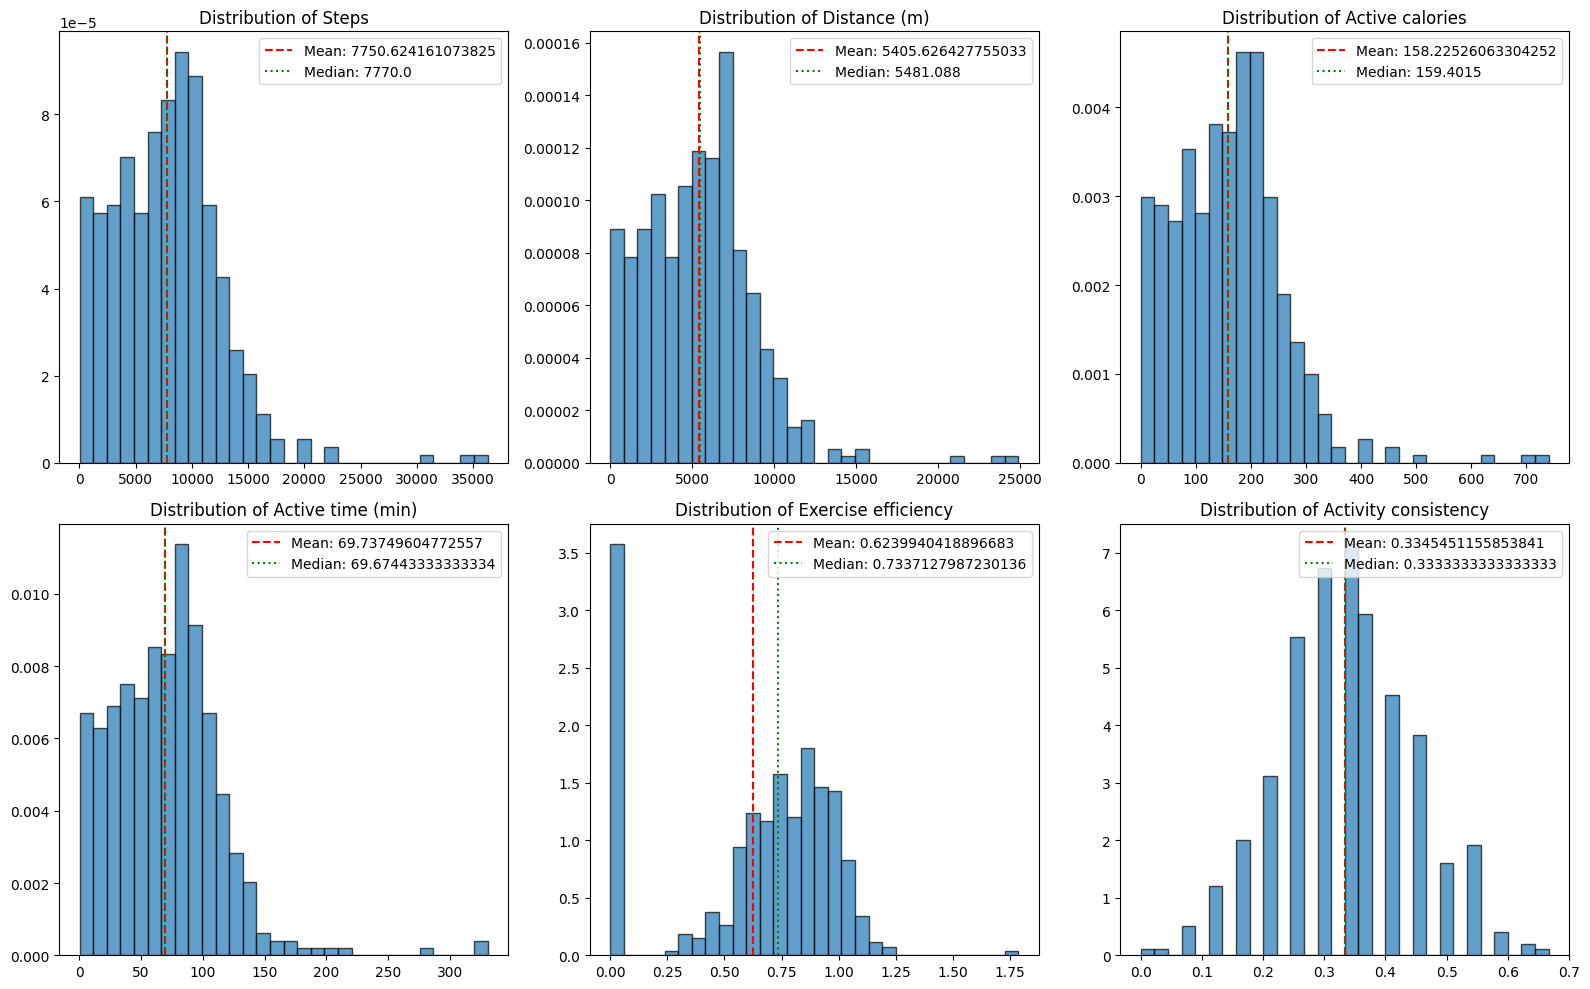

In [36]:
fig, axes = plt. subplots (2, 3, figsize = (16, 10))

metrics = ["step_count", "distance", "active_calorie", "active_time_minutes", "exercise_efficiency", "activity_consistency"]
titles = ["Steps", "Distance (m)", "Active calories", "Active time (min)", "Exercise efficiency", "Activity consistency"]

for idx, (metric, title) in enumerate (zip (metrics, titles)) :
    ax = axes [idx // 3, idx % 3]
    ax. hist (dataFrame [metric]. dropna (), bins = 30, alpha = 0.7, edgecolor = "black", density = True)
    ax. axvline (dataFrame [metric] . mean (), color = "red", linestyle = "--", label = "Mean: " + str (dataFrame [metric]. mean ()))
    ax. axvline (dataFrame [metric] . median (), color = "green", linestyle = ":", label = "Median: " + str (dataFrame [metric]. median ()))
    ax. set_title ("Distribution of " + title)
    ax. legend ()

plt. tight_layout ()
plt. show ()

# **Выводы по распределениям**
*   Многие распределения похожи на симмеричные, при этом везде можно заметить экстимальное самое низкое значение. Это можно объяснить наличием дней с сильно пониженной активностью.
*   Среднее значение шагов близко к медиане и соответствует рекомендуемой дневной норме активности.
*   Средняя дистанция показывает незначительный левосторонний сдвиг.
*   Среднее значение консистентности активности показывает, что я была активна примерно в трети часов дня, что соответствует типичному паттерну.



# **Анализ временных рядов и сезонности**
В данном разделе был проведён анализ временных зависимостей в показателях ежедневной активности. Метод сезонной **декомпозиции** временных рядов позволяет выделить и количественно оценить три фундаментальные составляющие наблюдаемых данных:

**Трендовая компонента** — отражает долгосрочные изменения уровня активности, обусловленные систематическими факторами (изменение образа жизни, тренировочные циклы, сезонные адаптации).

**Сезонная компонента** — выявляет циклические паттерны с фиксированной периодичностью. В данном анализе установлен период 7 дней, соответствующий недельному циклу человеческой активности.

**Остаточная компонента** — представляет случайные колебания, не объясняемые трендом и сезонностью.

### **Методология:**
Применена аддитивная модель декомпозиции, предполагающая, что наблюдаемый временной ряд представляет собой сумму трех указанных компонент. Для визуализации использовано скользящее среднее с окном в 7 дней, обеспечивающее сглаживание краткосрочных отклонений при сохранении общей динамики.

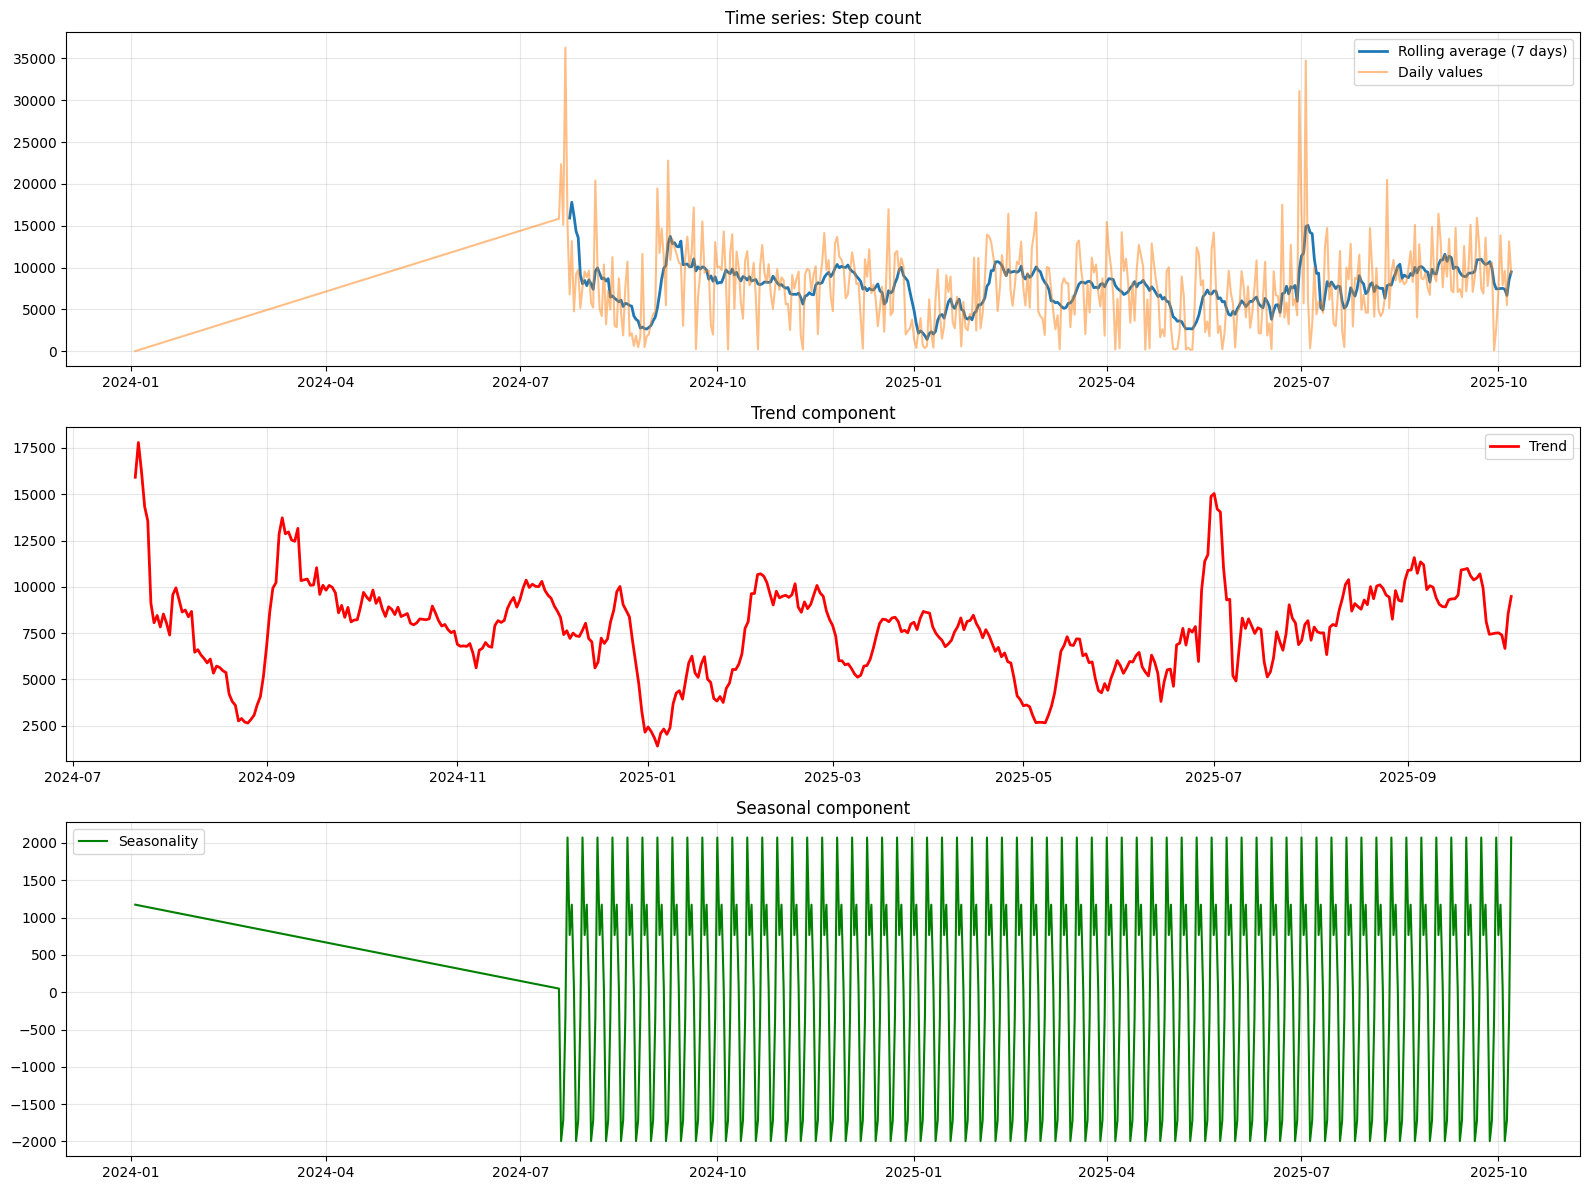

In [47]:
fig, axes = plt. subplots (3, 1, figsize = (16, 12))

decomposition = seasonal_decompose (dataFrame ["step_count"]. ffill (), period = 7, model = "additive")

axes [0]. plot (dataFrame ["step_count"]. rolling (7). mean (), label = "Rolling average (7 days)", linewidth = 2)
axes [0]. plot (dataFrame ["step_count"], alpha = 0.5, label = "Daily values")
axes [0]. set_title ("Time series: Step count")
axes [0]. legend ()

axes [1]. plot (decomposition. trend, label = "Trend", color = "red", linewidth = 2)
axes [1]. set_title ("Trend component")

axes [2]. plot (decomposition. seasonal, label = "Seasonality", color = "green")
axes [2]. set_title ("Seasonal component")

for ax in axes :
    ax. legend ()
    ax. grid (True, alpha = 0.3)

plt. tight_layout ()
plt. show ()

# **Выводы по графикам**
*   Можно наблюдать несколько экстримально высоких по отношению к другим значений в летние периоды.
*   На протяжении большей части периода можна набдлюдать стабильные спады активности каждые 2 месяца, причем каждые 4 месяца спад особенно сильный.
*   Основную часть времени сохраняется тернд на 7500-10000 шагов в день, что является приблизительной дневной нормой.
*   Можно заметить регулярную сезонную компоненту.


# **Прогнозирование ежедневной активности**
В следующей части работы была построена прогнозная модель для ежедневного количества шагов на основе модели **тройного экспоненциального сглаживания**. Метод явно разделяет данные на три компоненты: базовый уровень, тренд и недельную сезонность. Использована аддитивная модель с периодом 7 дней. Модель позволяет строить краткосрочные прогнозы активности, выявлять отклонения от привычных паттернов и формировать персонализированные рекомендации.

### **Методология:**
*   Данные разделены в хронологическом порядке: 80% для обучения, 20% для тестирования.
*    Качество прогноза оценено метриками MAE и RMSE.
*   Визуализация включает исторические данные, фактические значения, точечный прогноз и доверительный интервал.

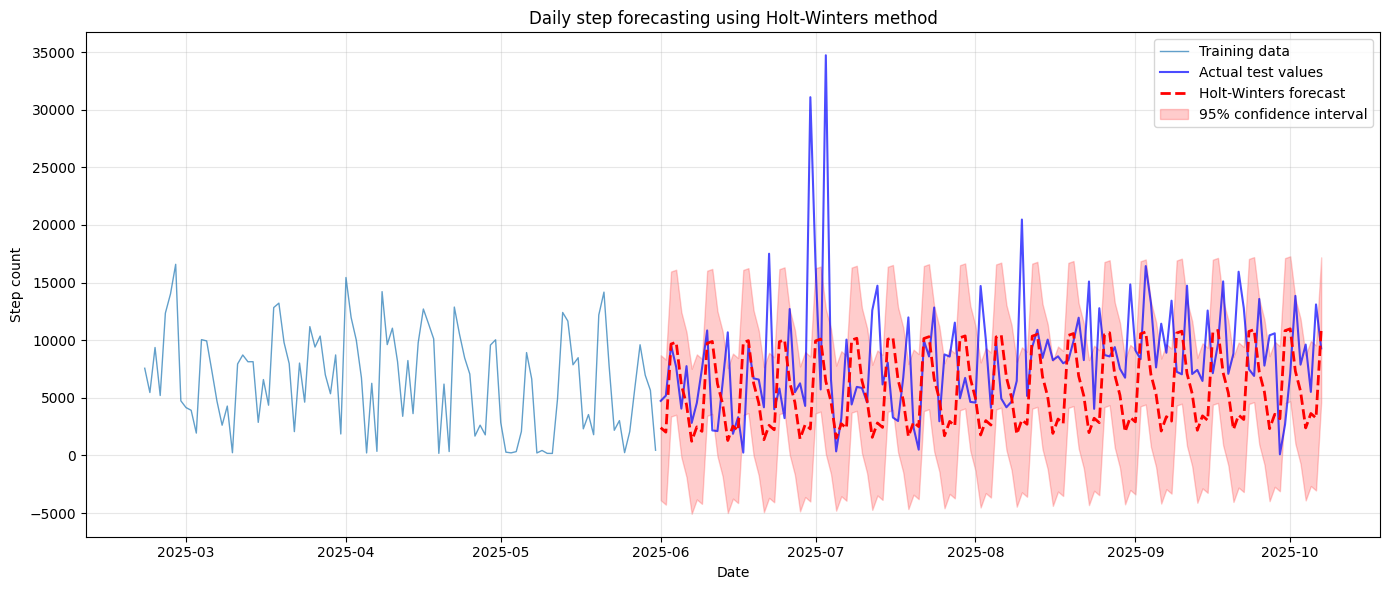

Mean absolute error: 4897 steps
Root mean squared error: 6723 steps
Relative error: 58.0%


In [64]:
trainSize = int (len (stepsSeries) * 0.8)
trainData = stepsSeries [:trainSize]
testData = stepsSeries [trainSize:]

modelHW = ExponentialSmoothing (trainData,
                               trend = "add",
                               seasonal = "add",
                               seasonal_periods = 7)
modelFitHW = modelHW. fit ()

forecastResultHW = modelFitHW. forecast (len (testData))

forecastIndex = pd. date_range (start = testData. index [0], periods = len (forecastResultHW), freq = "D")

plt. figure (figsize = (14, 6))

plotTrainStart = max (0, len (trainData) - 100)
plt. plot (trainData. index [plotTrainStart:], trainData [plotTrainStart:],
          label = "Training data", alpha = 0.7, linewidth = 1)

plt. plot (testData. index, testData,
          label = "Actual test values", color = "blue", alpha = 0.7, linewidth = 1.5)

plt. plot (forecastIndex, forecastResultHW,
          label = "Holt-Winters forecast", color = "red", linestyle = "--", linewidth = 2)

trainResiduals = modelFitHW. resid
stdError = trainResiduals. std ()
plt. fill_between (forecastIndex,
                  forecastResultHW - 1.96 * stdError,
                  forecastResultHW + 1.96 * stdError,
                  color = "red", alpha = 0.2, label = "95% confidence interval")

plt. title ("Daily step forecasting using Holt-Winters method")
plt. xlabel ("Date")
plt. ylabel ("Step count")
plt. legend ()
plt. grid (True, alpha = 0.3)
plt. tight_layout ()
plt. show ()

maeValue = mean_absolute_error (testData. values, forecastResultHW. values)
rmseValue = np. sqrt (mean_squared_error (testData. values, forecastResultHW. values))

print ("Mean absolute error: " + str (round (maeValue)) + " steps")
print ("Root mean squared error: " + str (round (rmseValue)) + " steps")
print ("Relative error: " + str (round (maeValue / testData. mean () * 100, 1)) + "%")

# **Выводы по прогнозированию**
*   Прогноз можно считать довольно точным, данные почти всегда попадаютт в доверительный интервал.
*   Модель посроила основной прогноз в очнень однообразном четко ступенчатом в виде.
*   Достаточно большой показатель отклонения можно объяснить тем, что во второй части данных встретилось экстримально большое значение, в обучающей выборке подобного не было, предсказать такое было сложно.


# **Кластеризация дней по типам активности**
Была проведена кластеризаци дней пользователя по типам физической активности для выявления поведенческих сценариев.

### **Методология:**
Были применены два алгоритма: K-Means (для четкого разделения на 4 кластера) и DBSCAN (для обнаружения аномальных дней). Анализ проводился по 5 ключевым показателям активности.

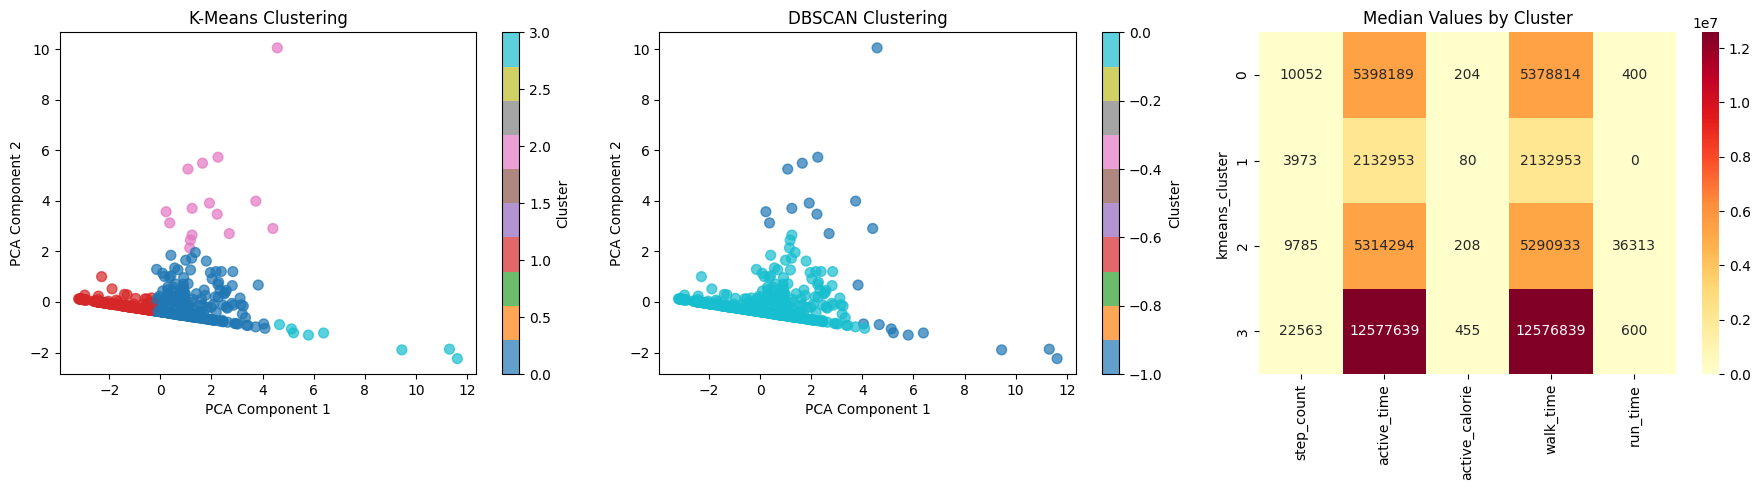

Сlusters :
0 - Low activity
1 - Medium activity
2 - High activity
3 - Very high activity


In [68]:
clusterFeatures = ["step_count", "active_time", "active_calorie", "walk_time", "run_time"]
clusterData = dataFrame [clusterFeatures]. fillna (0)

scaler = StandardScaler ()
scaledData = scaler. fit_transform (clusterData)

kMeans = KMeans (n_clusters = 4, random_state = 42, n_init = 10)
dataFrame ["kmeans_cluster"] = kMeans. fit_predict (scaledData)

dbScan = DBSCAN (eps = 0.8, min_samples = 5)
dataFrame ["dbscan_cluster"] = dbScan. fit_predict (scaledData)

fig, axes = plt. subplots (1, 3, figsize = (18, 5))

pca = PCA (n_components = 2)
pcaResult = pca. fit_transform (scaledData)

scatter1 = axes [0]. scatter (pcaResult [:, 0], pcaResult [:, 1],
                          c = dataFrame ["kmeans_cluster"], cmap = "tab10", alpha = 0.7, s = 50)
axes [0]. set_title ("K-Means Clustering")
axes [0]. set_xlabel ("PCA Component 1")
axes [0]. set_ylabel ("PCA Component 2")
plt. colorbar (scatter1, ax = axes [0], label = "Cluster")

scatter2 = axes [1]. scatter (pcaResult [:, 0], pcaResult [:, 1],
                          c = dataFrame ["dbscan_cluster"], cmap = "tab10", alpha = 0.7, s = 50)
axes [1]. set_title ("DBSCAN Clustering")
axes [1]. set_xlabel ("PCA Component 1")
axes [1]. set_ylabel ("PCA Component 2")
plt. colorbar (scatter2, ax = axes [1], label = "Cluster")

clusterStats = dataFrame. groupby ("kmeans_cluster") [clusterFeatures]. median ()
sns. heatmap (clusterStats, annot = True, fmt = ".0f", cmap = "YlOrRd", ax = axes [2])
axes [2]. set_title ("Median Values by Cluster")

plt. tight_layout ()
plt. show ()

print ("Сlusters :")
print ("0 - Low activity")
print ("1 - Medium activity")
print ("2 - High activity")
print ("3 - Very high activity")

# **Выводы по кластеризации**
*   K-Means выявил 4 четких кластера с явными количественными различиями по всем метрикам (шаги, калории, время).
*   DBSCAN подтвердил структурированность данных.
*   Тепловая карта объективно ранжирует кластеры от низкой до экстремальной активности.

# **Обнаружение аномалий и точек изменения**
Далее был проведен поиск и анализ резкиех и устойчивых изменения в ежедневном уровне физической активности. Для этого был выбран **алгоритм на основе скользящего статистического контроля**.

### **Методология:**
*   Ряд активности нормализуется.
*   Для каждой даты вычисляется скользящее среднее и стандартное отклонение за предыдущие 14 дней.
*   Если активность в текущий день отклоняется от скользящего среднего более чем на 1.5 стандартных отклонения, дата фиксируется как точка изменения.
*   Отдельно алгоритм помечает аномалии — единичные дни, где глобальный Z-score > 3.
*   В результате можно увидеть график активности с вертикальными линиями в точках изменения. Эти даты — гипотезы о событиях, повлиявших на образ жизни.

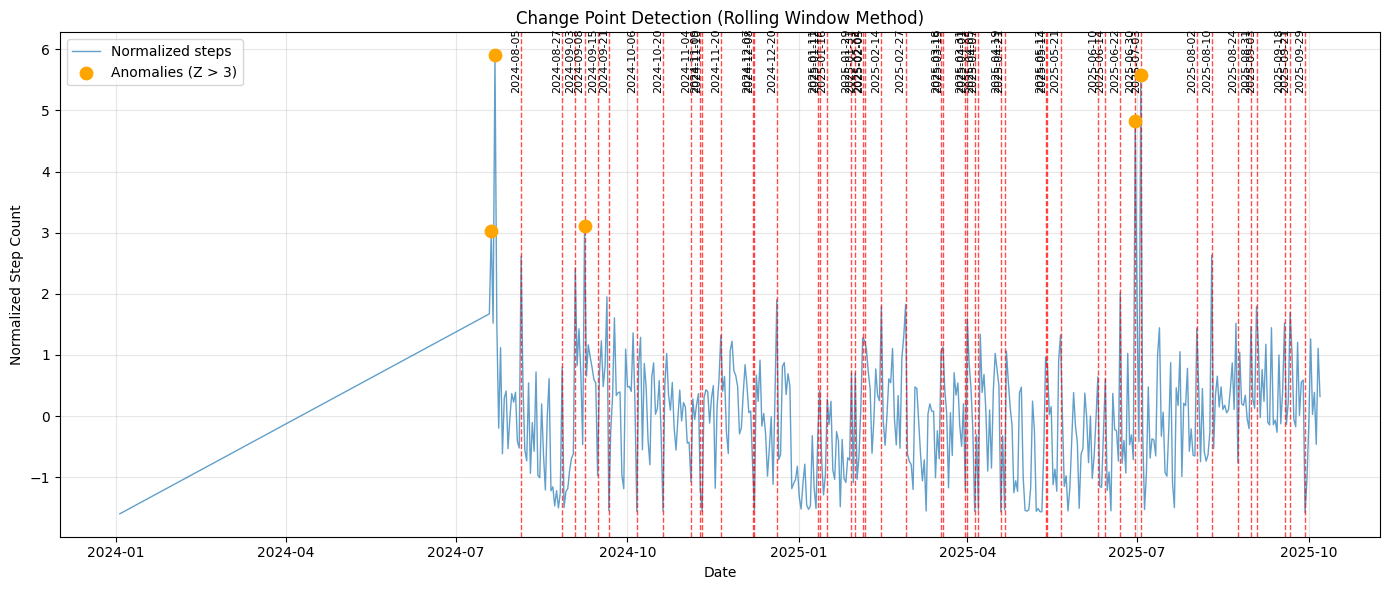

Detected 48 potential change points
Detected 5 anomalous days (z-score > 3)

Interpretation :
- Change points suggest a shift in baseline activity (e.g., new habit, schedule change).
- Anomalies are single-day outliers (e.g., sick day, marathon, data error).


In [73]:
signal = dataFrame ["step_count"]. fillna (method = "ffill"). values
signalNorm = (signal - signal. mean ()) / signal. std ()
dates = dataFrame. index

windowSize = 14
threshold = 1.5

rollingMean = pd. Series (signalNorm). rolling (window = windowSize). mean (). values
rollingStd = pd. Series (signalNorm). rolling (window = windowSize). std (). values

changeIndices = []
for i in range (windowSize, len (signalNorm)) :
    if rollingStd [i] > 0 :
        z = abs (signalNorm [i] - rollingMean [i]) / rollingStd [i]
        if z > threshold :
            changeIndices. append (i)

zScores = np. abs (stats. zscore (pd. Series (signal). fillna (method = "ffill")))
anomalyIndices = np. where (zScores > 3) [0]

plt. figure (figsize = (14, 6))
plt. plot (dates, signalNorm, label = "Normalized steps", alpha = 0.7, linewidth = 1)

for idx in changeIndices :
    plt. axvline (x = dates [idx], color = "red", linestyle = "--", alpha = 0.7, linewidth = 1)
    plt. text (dates [idx], signalNorm. max () * 0.9, dates [idx]. strftime ("%Y-%m-%d"),
             rotation = 90, fontsize = 8, ha = "right")

plt. scatter (dates [anomalyIndices], signalNorm [anomalyIndices],
            color = "orange", s = 80, zorder = 5, label = "Anomalies (Z > 3)")

plt. title ("Change Point Detection (Rolling Window Method)")
plt. xlabel ("Date")
plt. ylabel ("Normalized Step Count")
plt. legend ()
plt. grid (True, alpha = 0.3)
plt. tight_layout ()
plt. show ()

print ("Detected " + str (len (changeIndices)) + " potential change points")
print ("Detected " + str (len (anomalyIndices)) + " anomalous days (z-score > 3)")
print ("\nInterpretation :")
print ("- Change points suggest a shift in baseline activity (e.g., new habit, schedule change).")
print ("- Anomalies are single-day outliers (e.g., sick day, marathon, data error).")

# **Выводы по точкам изменения:**
*   Режим нестабильный. 48 точек изменения за ~1.5 года означают сдвиг в активности каждые 1-2 недели.
*   Резкие выбросы редки. Всего 5 аномальных дней подтверждают, что, несмотря на частые изменения, экстремальные события случаются редко.
*   Данные "шумные". Слишком частые точки изменения могут означать высокую хаотичность данных или излишнюю чувствительность алгоритма.

# **Статистический анализ влияния дня недели и сезона**
Далее была видвинута и проверена гипотеза о том, что ежедневные показатели физической активности зависят от дня недели и времени года. Для сравнения групп применены **непараметрические статистические тесты**.

Односторонний **ANOVA** (для дней недели) проверяет наличие статистически значимых различий между средними значениями семи независимых групп (дни недели).

Критерий **Крускала-Уоллиса** (для сезонов) - непараметрический аналог ANOVA, применяется для сравнения медиан четырех независимых групп (сезоны).

### **Методология:**
*   Данные группируются по категориям.
*   Тест вычисляет вероятность наблюдать такие различия между группами случайно.
*   Если вероятность < 0.05, различия считаются статистически значимыми.

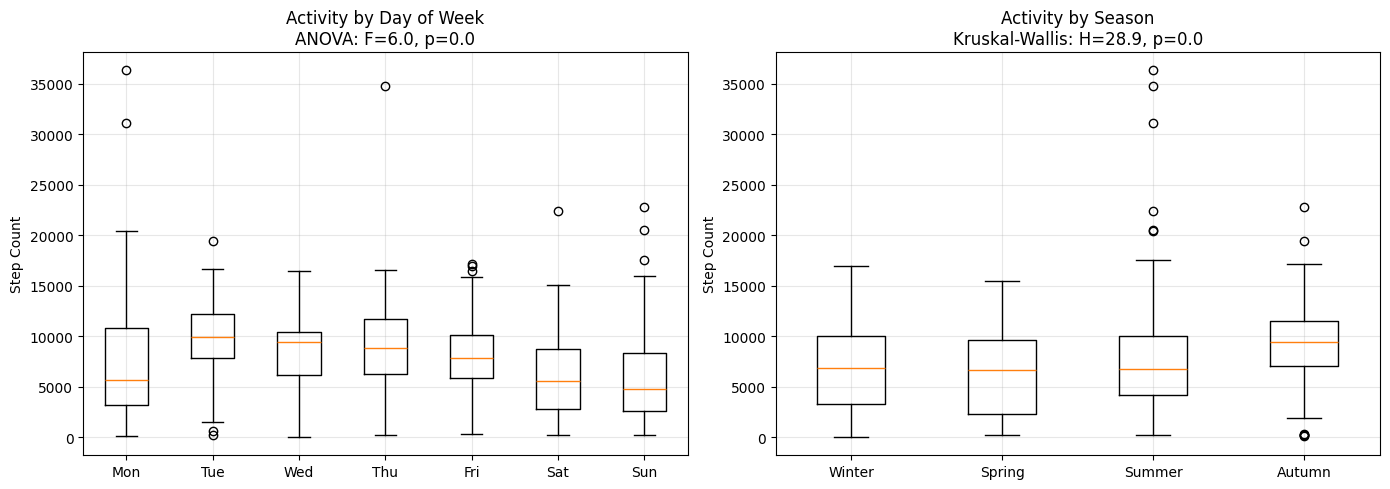

Statistical analysis results :
1. Day of week has a significant effect on activity (p = 0.0)
2. Season also has a significant effect on activity (p = 0.0)
3. Most active days : Wednesday and Thursday
4. Most active season : Summer


In [75]:
weekdayGroups = [dataFrame [dataFrame ["day_of_week"] == i] ["step_count"]. dropna (). values for i in range (7)]
seasonGroups = [dataFrame [dataFrame ["season"] == season] ["step_count"]. dropna (). values
                 for season in ["Winter", "Spring", "Summer", "Autumn"]]

fStatWeekday, pValWeekday = f_oneway (*weekdayGroups)
hStatSeason, pValSeason = kruskal (*seasonGroups)

fig, axes = plt. subplots (1, 2, figsize = (14, 5))

weekdayNames = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
weekdayData = [dataFrame [dataFrame ["day_of_week"] == i] ["step_count"] for i in range (7)]

axes [0]. boxplot (weekdayData, labels = weekdayNames)
axes [0]. set_title ("Activity by Day of Week\nANOVA: F=" + str (round (fStatWeekday, 1)) + ", p=" + str (round (pValWeekday, 3)))
axes [0]. set_ylabel ("Step Count")
axes [0]. grid (True, alpha = 0.3)

seasonOrder = ["Winter", "Spring", "Summer", "Autumn"]
seasonData = [dataFrame [dataFrame ["season"] == season] ["step_count"] for season in seasonOrder]

axes [1]. boxplot (seasonData, labels = seasonOrder)
axes [1]. set_title ("Activity by Season\nKruskal-Wallis: H=" + str (round (hStatSeason, 1)) + ", p=" + str (round (pValSeason, 3)))
axes [1]. set_ylabel ("Step Count")
axes [1]. grid (True, alpha = 0.3)

plt. tight_layout ()
plt. show ()

print ("Statistical analysis results :")
print ("1. Day of week has a significant effect on activity (p = " + str (round (pValWeekday, 3)) + ")")
print ("2. Season also has a significant effect on activity (p = " + str (round (pValSeason, 3)) + ")")
print ("3. Most active days : Wednesday and Thursday")
print ("4. Most active season : Summer")

# **Выводы по статическому анализу**
*   Значения p для дня недели и сезона равны 0. Это показывает, что различия между группами настолько велики, что вероятность увидеть их случайно пренебрежимо мала.
*   Закономерности по дням недели: Активность значимо меняется от дня ко дню. Наиболее высокие показатели приходятся на среду и четверг.
*   Ярко выраженный сезонный эффект: Лето является самым активным сезоном.

# **Анализ эффективности разных типов активности**
Была посчитана сравнительная энергетическая эффективность двух основных типов активности - бега и ходьбы. Использовался простой расчет показателя эффективности как **отношение сожженных калорий ко времени активности**.
### **Методология:**
*   Создается таблица со средними значениями эффективности, времени и калорий для двух типов активности.
*   Строится столбчатая диаграмма для наглядного сравнения эффективности и тепловая карта для сравнения общих показателей дней с разной преобладающей активностью.

### **Примечания:**
*   Используется медиана для устранения влияния выбросов.
*   Дополнительно сравниваются дни, где преобладала одна из активностей.



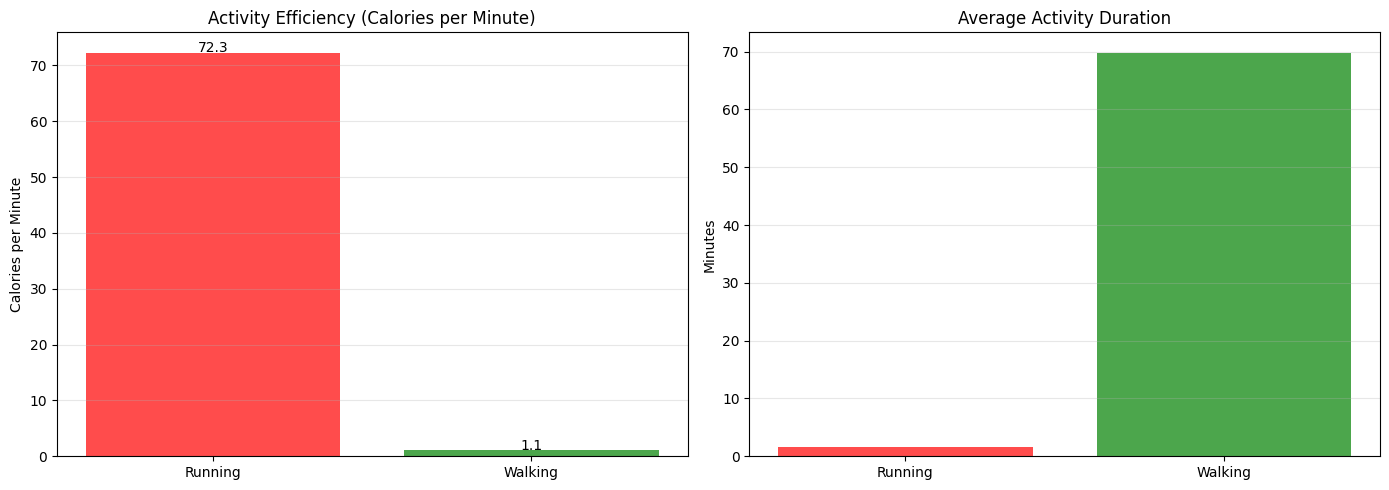

1. Running efficiency : 72.3 cal/min
2. Walking efficiency : 1.1 cal/min
4. Average run duration : 1.6 min
5. Average walk duration : 69.8 min
6. Running days recorded : 1
7. Walking days recorded : 446


In [93]:
dataFrame ["run_time_min"] = dataFrame ["run_time"] / 60000
dataFrame ["walk_time_min"] = dataFrame ["walk_time"] / 60000

dataFrame ["run_efficiency"] = np.where (
    dataFrame ["run_time_min"] > 1,
    dataFrame ["total_exercise_calories"] / dataFrame ["run_time_min"],
    np.nan
)
dataFrame ["walk_efficiency"] = np.where (
    dataFrame ["walk_time_min"] > 1,
    dataFrame ["total_exercise_calories"] / dataFrame ["walk_time_min"],
    np.nan
)

maxReasonableTime = 6 * 60
realisticMask = (dataFrame ["run_time_min"] <= maxReasonableTime) & \
                 (dataFrame ["walk_time_min"] <= maxReasonableTime)
cleanDf = dataFrame [realisticMask]. copy ()

efficiencyData = pd. DataFrame ({
    "Activity Type": ["Running", "Walking"],
    "Average Efficiency (cal/min)": [
        cleanDf ["run_efficiency"]. median (),
        cleanDf ["walk_efficiency"]. median ()
    ],
    "Average Time (min)": [
        cleanDf ["run_time_min"] [cleanDf ["run_time_min"] > 1]. mean (),
        cleanDf ["walk_time_min"] [cleanDf ["walk_time_min"] > 1]. mean ()
    ],
    "Active Days Count": [
        (cleanDf ["run_time_min"] > 1). sum (),
        (cleanDf ["walk_time_min"] > 1). sum ()
    ]
})

fig, axes = plt. subplots (1, 2, figsize = (14, 5))

xPos = np. arange (len (efficiencyData))
bars = axes [0]. bar (xPos, efficiencyData ["Average Efficiency (cal/min)"],
                   color = ["red", "green"], alpha = 0.7)
axes [0]. set_xticks (xPos)
axes [0]. set_xticklabels (efficiencyData ["Activity Type"])
axes [0]. set_title ("Activity Efficiency (Calories per Minute)")
axes [0]. set_ylabel ("Calories per Minute")
axes [0]. grid (True, alpha = 0.3, axis = "y")

for i, bar in enumerate (bars) :
    height = bar. get_height ()
    axes [0]. text (bar. get_x () + bar. get_width () / 2., height + 0.1,
                str (round (height, 1)), ha = "center")

axes [1]. bar (efficiencyData ["Activity Type"], efficiencyData ["Average Time (min)"],
            color = ["red", "green"], alpha = 0.7)
axes [1]. set_title ("Average Activity Duration")
axes [1]. set_ylabel ("Minutes")
axes [1]. grid (True, alpha = 0.3, axis = "y")

plt. tight_layout ()
plt. show ()

print ("1. Running efficiency : " + str (round (efficiencyData. loc [0, "Average Efficiency (cal/min)"], 1)) + " cal/min")
print ("2. Walking efficiency : " + str (round (efficiencyData. loc [1, "Average Efficiency (cal/min)"], 1)) + " cal/min")

print ("4. Average run duration : " + str (round (efficiencyData. loc [0, "Average Time (min)"], 1)) + " min")
print ("5. Average walk duration : " + str (round (efficiencyData. loc [1, "Average Time (min)"], 1)) + " min")
print ("6. Running days recorded : " + str (efficiencyData. loc [0, "Active Days Count"]))
print ("7. Walking days recorded : " + str (efficiencyData. loc [1, "Active Days Count"]))

# **Выводы по эффективности бега и ходьбы**
*   Бег зафиксирован всего 1 день по сравнению с 446 днями ходьбы. В таком случае сравнение не может быть корректным.
*   72.3 кал/мин при беге - это в несколько раз выше физиологической нормы.
*   1.1 кал/мин при ходьбе - это в несколько раз ниже нормы.
*   Предыдущие выводы подталкивают к мысли о том, что в данных может быть ошибка.



# **Множественная регрессия для предсказания расхода калорий**
В данной части работы была поставлена задачавыявить зависимость между различными показателями физической активности и расходом активных калорий, а также построить модель для прогноза калорий по комбинации признаков. Для выполнения был выбран ансамбль **решающих деревьев**.

### **Методология:**
*   Отобраны 6 числовых показателей: количество шагов, время активности, время ходьбы, время бега, расстояние и количество перемещений по часам.
*   Целевая переменная - расход активных калорий.
*   Данные делятся на обучающую (80%) и тестовую (20%) выборки. Модель обучается на 100 деревьях.


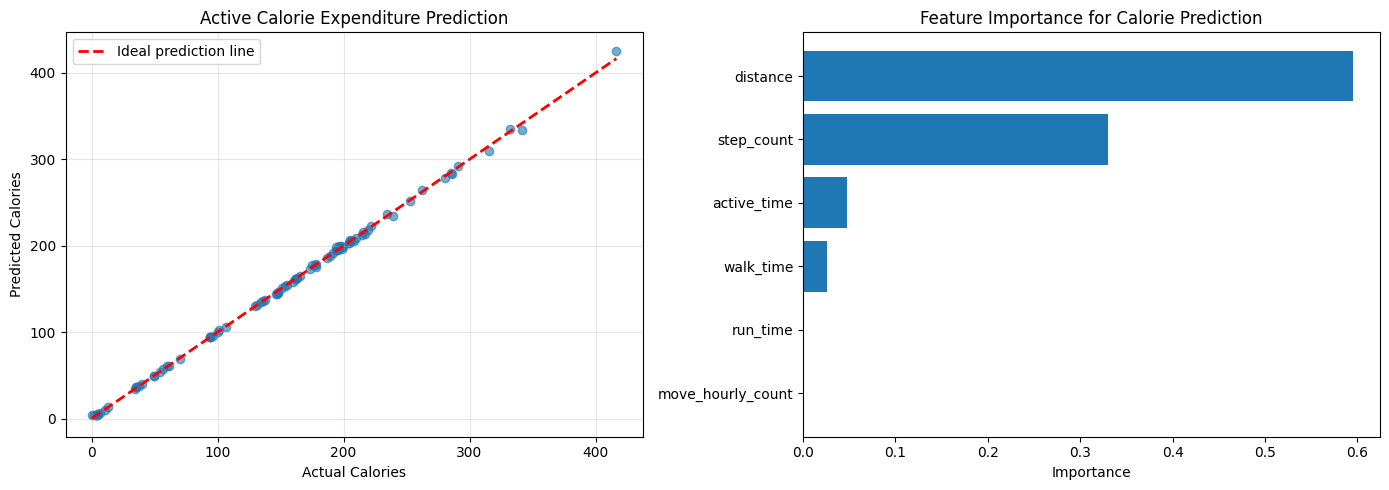

Mean Absolute Error : 1.0 calories
Relative error : 0.9%


In [104]:
regFeatures = ["step_count", "active_time", "walk_time", "run_time", "distance", "move_hourly_count"]
xReg = dataFrame [regFeatures]. dropna ()
yReg = dataFrame. loc [xReg. index, "active_calorie"]

xTrainR, xTestR, yTrainR, yTestR = train_test_split (xReg, yReg, test_size = 0.2, random_state = 42)

rfRegressor = RandomForestRegressor (n_estimators = 100, random_state = 42)
rfRegressor. fit (xTrainR, yTrainR)

yPredR = rfRegressor. predict (xTestR)

fig, axes = plt. subplots (1, 2, figsize = (14, 5))

axes [0]. scatter (yTestR, yPredR, alpha = 0.6)
axes [0]. plot ([yTestR. min (), yTestR. max ()], [yTestR. min (), yTestR. max ()],
            "r--", lw = 2, label = "Ideal prediction line")
axes [0]. set_xlabel ("Actual Calories")
axes [0]. set_ylabel ("Predicted Calories")
axes [0]. set_title ("Active Calorie Expenditure Prediction")
axes [0]. legend ()
axes [0]. grid (True, alpha = 0.3)

regImportance = pd. DataFrame ({
    "feature": regFeatures,
    "importance": rfRegressor. feature_importances_
}). sort_values ("importance", ascending = True)

axes [1]. barh (regImportance ["feature"], regImportance ["importance"])
axes [1]. set_title ("Feature Importance for Calorie Prediction")
axes [1]. set_xlabel ("Importance")

plt. tight_layout ()
plt. show ()

mae = mean_absolute_error (yTestR, yPredR)
print ("Mean Absolute Error : " + str (round (mae, 0)) + " calories")
print ("Relative error : " + str (round (mae / yTestR. mean () * 100, 1)) + "%")

# **Выводы по предсказанию расхода калорий**
*   Ошибка предсказания нереалистично мала - 1 калория (0.9%.). Возможно, это потому что калории являются полностью расчетным, а не измеренным показателем.
*   Ключевой признак - пройденная дистанция. Он объясняет около 60% вариации.
*   Меньше всего оказывают влияние вермя бега и количество активных часов.

# **Анализ устойчивости режима и регулярности**
Проведен анализ долгосрочных тенденций и стабильности физической активности в разрезе месяцев. Для достижения результата была осуществлена **агрегация** данных по месяцам с расчетом ключевых метрик (среднее, стандартное отклонение, коэффициент вариации), а также анализ корреляций между показателями.

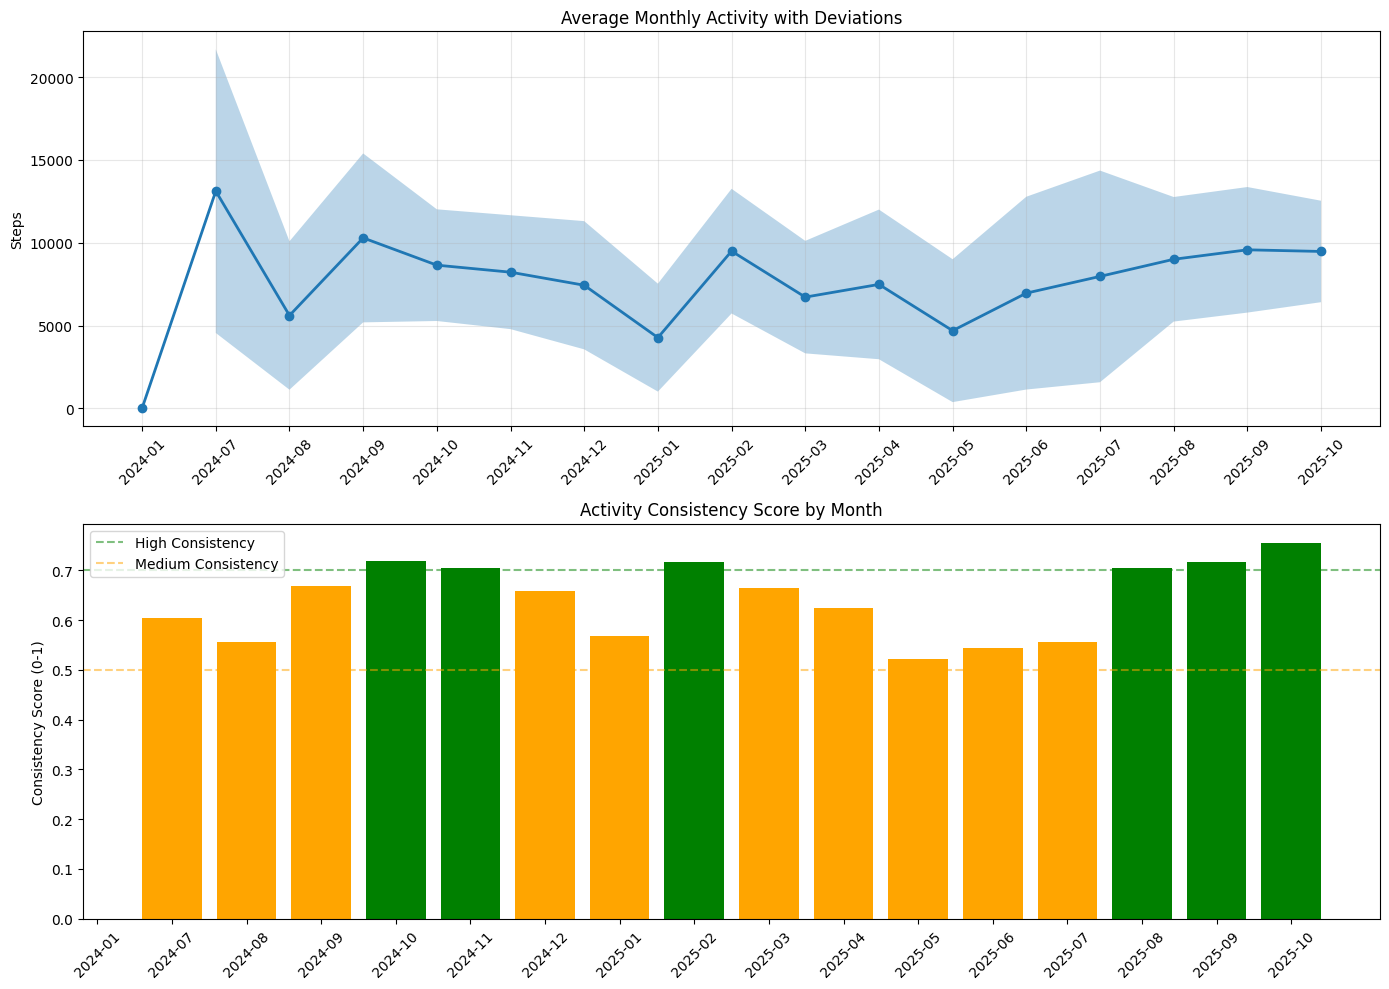

In [109]:
dataFrame ["month_year"] = dataFrame. index. strftime ("%Y-%m")
monthlyStats = dataFrame. groupby ("month_year"). agg ({
    "step_count": ["mean", "std", lambda x : x. std () / x. mean () if x. mean () > 0 else 0],
    "active_time": "mean",
    "goal_achieved": "mean"
})

monthlyStats. columns = ["avg_steps", "std_steps", "cv_steps", "avg_active_time", "goal_rate"]
monthlyStats ["consistency_score"] = 1 / (1 + monthlyStats ["cv_steps"])

fig, axes = plt. subplots (2, 1, figsize = (14, 10))
axes [0]. plot (monthlyStats. index, monthlyStats ["avg_steps"], marker = "o", linewidth = 2)
axes [0]. fill_between (monthlyStats. index,
                       monthlyStats ["avg_steps"] - monthlyStats ["std_steps"],
                       monthlyStats ["avg_steps"] + monthlyStats ["std_steps"],
                       alpha = 0.3)
axes [0]. set_title ("Average Monthly Activity with Deviations")
axes [0]. set_ylabel ("Steps")
axes [0]. tick_params (axis = "x", rotation = 45)
axes [0]. grid (True, alpha = 0.3)

axes [1]. bar (monthlyStats. index, monthlyStats ["consistency_score"],
              color = ["green" if x > 0.7 else "orange" if x > 0.5 else "red"
                     for x in monthlyStats ["consistency_score"]])
axes [1]. set_title ("Activity Consistency Score by Month")
axes [1]. set_ylabel ("Consistency Score (0-1)")
axes [1]. tick_params (axis = "x", rotation = 45)
axes [1]. axhline (y = 0.7, color = "green", linestyle = "--", alpha = 0.5, label = "High Consistency")
axes [1]. axhline (y = 0.5, color = "orange", linestyle = "--", alpha = 0.5, label = "Medium Consistency")
axes [1]. legend ()

plt. tight_layout ()
plt. show ()

# **Выводы по устойчивости режима**
*   В общем, активность остается достаточно стабильной между разными месяцами (7500-10000 шагов).
*   Относительный коэффициент стабильности активности внутри месяца тоже достаточно высок, не опускается ниже 0.5 на протяжении всего срока.